## Importing all the necassary libraries

In [445]:
import pandas as pd
import numpy as np
import json
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

pd.reset_option('max_colwidth')

nltk.download('words')  
nltk.download('punkt')  

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Sherow\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sherow\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Data Analysis and Data Cleaning ##

Loading the Dataset from a CSV File

In [446]:
# Load the dataset from a CSV file into the 'df' DataFrame.
df = pd.read_csv(r'c:\YoutubeProject\US_youtube_trending_data.csv')

Displaying Information About the Dataset

In [447]:
# Use df.info() to display details about the DataFrame, including column names and data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229588 entries, 0 to 229587
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           229588 non-null  object
 1   title              229588 non-null  object
 2   publishedAt        229588 non-null  object
 3   channelId          229588 non-null  object
 4   channelTitle       229588 non-null  object
 5   categoryId         229588 non-null  int64 
 6   trending_date      229588 non-null  object
 7   tags               229588 non-null  object
 8   view_count         229588 non-null  int64 
 9   likes              229588 non-null  int64 
 10  dislikes           229588 non-null  int64 
 11  comment_count      229588 non-null  int64 
 12  thumbnail_link     229588 non-null  object
 13  comments_disabled  229588 non-null  bool  
 14  ratings_disabled   229588 non-null  bool  
 15  description        225188 non-null  object
dtypes: bool(2), int64(5)

Dropping Unnecessary Columns

In [448]:
# Remove the 'thumbnail_link' column
df.drop('thumbnail_link', axis=1, inplace=True)

# Remove the 'video_id' column
df.drop('video_id', axis=1, inplace=True)

# Remove the 'channelId' column
df.drop('channelId', axis=1, inplace=True)

df = df[(df['dislikes'] != 0) | ((df['dislikes'] == 0) & (df['likes'] == 0))]

df = df[(df['view_count'] != 0)]

df= df[df['tags']!= '[none]']

In [449]:
aggregation = {
    'view_count': 'sum',
    'likes': 'sum',
    'dislikes': 'sum',
    'comment_count': 'sum'
}


aggregated_df = df.groupby('title').agg(aggregation).reset_index()


df = pd.merge(df.drop(['view_count', 'likes', 'dislikes', 'comment_count'], axis=1), aggregated_df, on='title', how='left')

df = df.drop_duplicates()


In [450]:
df

,title,publishedAt,channelTitle,categoryId,trending_date,tags,comments_disabled,ratings_disabled,description,view_count,likes,dislikes,comment_count
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,23894129,1345181,69984,302899
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,False,False,"While running her own modding shop, Ramya Pare...",15496923,787930,16531,88147
2,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,False,False,I left youtube for a month and this is what ha...,21601491,2984775,27245,319081
3,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,4994407,158882,14004,47763
4,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,False,False,Transforming The LaBrant Family's empty white ...,12314342,348515,10689,16118
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99337,DRAGON BALL LEGENDS REVEALS ＆ STUFF #31,2023-09-12T14:00:07Z,Bandai Namco Entertainment,20,2023-09-18T00:00:00Z,バンダイナムコ|バンナム|876|876TV|BNE|バンダイナムコエンターテインメント|B...,True,True,Reveals & Stuff #31 is coming!Get all the late...,644650,0,0,0
99338,Nintendo Direct 9.14.2023 - Nintendo Switch,2023-09-14T14:48:31Z,Nintendo of America,20,2023-09-19T00:00:00Z,nintendo|game|gameplay|fun|video game|action|a...,False,True,Watch the latest Nintendo Direct livestream fe...,31968780,0,0,73254
99339,Nintendo Direct 9.14.2023 - Nintendo Switch,2023-09-14T14:48:31Z,Nintendo of America,20,2023-09-20T00:00:00Z,nintendo|game|gameplay|fun|video game|action|a...,False,True,Watch the latest Nintendo Direct livestream fe...,31968780,0,0,73254
99340,Nintendo Direct 9.14.2023 - Nintendo Switch,2023-09-14T14:48:31Z,Nintendo of America,20,2023-09-21T00:00:00Z,nintendo|game|gameplay|fun|video game|action|a...,False,True,Watch the latest Nintendo Direct livestream fe...,31968780,0,0,73254


In [451]:
corr=df.corr()
corr

C:\Users\Sherow\AppData\Local\Temp\ipykernel_15532\3182140910.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


,categoryId,comments_disabled,ratings_disabled,view_count,likes,dislikes,comment_count
categoryId,1.000000,0.083374,0.001120,-0.011498,-0.039361,-0.016853,-0.059098
comments_disabled,0.083374,1.000000,0.235283,0.005304,-0.019033,0.009741,-0.018257
ratings_disabled,0.001120,0.235283,1.000000,0.001698,-0.024493,-0.016871,-0.009279
view_count,-0.011498,0.005304,0.001698,1.000000,0.925141,0.870334,0.277548
likes,-0.039361,-0.019033,-0.024493,0.925141,1.000000,0.849148,0.492347
dislikes,-0.016853,0.009741,-0.016871,0.870334,0.849148,1.000000,0.390462
comment_count,-0.059098,-0.018257,-0.009279,0.277548,0.492347,0.390462,1.000000


Loading Video Genres from a JSON File

In [452]:
# Open the JSON file containing category information
with open(r'c:\YoutubeProject\US_category_id.json') as f:
    category_dict = json.load(f)  # Store category names and their numerical IDs

# Replace numerical category IDs with their corresponding category names
df['categoryName'] = df['categoryId'].astype(str).replace(category_dict)

# Drop the 'categoryId' column to retain only the category names
df = df.drop('categoryId', axis=1)

df.head(2)

,title,publishedAt,channelTitle,trending_date,tags,comments_disabled,ratings_disabled,description,view_count,likes,dislikes,comment_count,categoryName
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,Brawadis,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,23894129,1345181,69984,302899,People & Blogs
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,Apex Legends,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,False,False,"While running her own modding shop, Ramya Pare...",15496923,787930,16531,88147,Gaming


In [453]:
df = df.drop_duplicates(subset='title')

Turning tags into a list format

In [454]:
# Defining a function for clean text
def clean_tag(tags):
    return [tag.lower().replace('"', '') for tag in tags.split('|')]

# Applying clean textf function for df
df['tags'] = df['tags'].apply(clean_tag)

df = df[df['tags'].apply(lambda x: '[none]' not in x)]

Tokenize title column and removing stop words

In [455]:
# Function to clean and preprocess a title
def clean_title(title):
    # Convert to lowercase
    title = title.lower()
    
    # Remove special characters, numbers, and punctuation
    title = re.sub(r'[^a-zA-Z\s]', '', title)
    
    # Tokenize the title
    tokens = title.split()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Rejoin the cleaned tokens
    cleaned_title = ' '.join(tokens)
    
    return cleaned_title

# Apply the clean_title function to the 'title' column
df['cleaned_title'] = df['title'].apply(clean_title)
df.head(2)

,title,publishedAt,channelTitle,trending_date,tags,comments_disabled,ratings_disabled,description,view_count,likes,dislikes,comment_count,categoryName,cleaned_title
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,Brawadis,2020-08-12T00:00:00Z,"[brawadis, prank, basketball, skits, ghost, fu...",False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,23894129,1345181,69984,302899,People & Blogs,asked girlfriend
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,Apex Legends,2020-08-12T00:00:00Z,"[apex legends, apex legends characters, new ap...",False,False,"While running her own modding shop, Ramya Pare...",15496923,787930,16531,88147,Gaming,apex legends stories outlands endorsement


In [456]:
df

,title,publishedAt,channelTitle,trending_date,tags,comments_disabled,ratings_disabled,description,view_count,likes,dislikes,comment_count,categoryName,cleaned_title
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,Brawadis,2020-08-12T00:00:00Z,"[brawadis, prank, basketball, skits, ghost, fu...",False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,23894129,1345181,69984,302899,People & Blogs,asked girlfriend
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,Apex Legends,2020-08-12T00:00:00Z,"[apex legends, apex legends characters, new ap...",False,False,"While running her own modding shop, Ramya Pare...",15496923,787930,16531,88147,Gaming,apex legends stories outlands endorsement
2,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,jacksepticeye,2020-08-12T00:00:00Z,"[jacksepticeye, funny, funny meme, memes, jack...",False,False,I left youtube for a month and this is what ha...,21601491,2984775,27245,319081,Entertainment,left youtube month happened
3,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,XXL,2020-08-12T00:00:00Z,"[xxl freshman, xxl freshmen, 2020 xxl freshman...",False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,4994407,158882,14004,47763,Music,xxl freshman class revealed official announcement
4,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,Mr. Kate,2020-08-12T00:00:00Z,"[the labrant family, diy, interior design, mak...",False,False,Transforming The LaBrant Family's empty white ...,12314342,348515,10689,16118,Howto & Style,ultimate diy home movie theater labrant family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99310,ARGENTINA vs. ECUADOR [1-0] | RESUMEN | ELIMIN...,2023-09-08T03:09:12Z,CONMEBOL,2023-09-10T00:00:00Z,"[fútbol, pelota, gol, copa, libertadores, suda...",False,True,¡Ganó Argentina por las #EliminatoriasSudameri...,16654457,0,0,14471,Sports,argentina vs ecuador resumen eliminatorias sud...
99311,BRASIL vs. BOLIVIA [5-1] | RESUMEN | ELIMINATO...,2023-09-09T04:55:46Z,CONMEBOL,2023-09-11T00:00:00Z,"[fútbol, pelota, gol, copa, libertadores, suda...",False,True,"Espetáculo brasileiro! 🤩🔥Com 2️⃣ de Neymar, a ...",22708962,0,0,21462,Sports,brasil vs bolivia resumen eliminatorias sudame...
99317,BOLIVIA vs. ARGENTINA [0-3] | RESUMEN | ELIMIN...,2023-09-13T00:12:29Z,CONMEBOL,2023-09-13T00:00:00Z,"[fútbol, pelota, gol, copa, libertadores, suda...",False,True,¡Goleada de #Argentina en La Paz! La Albiceles...,20276422,0,0,15458,Sports,bolivia vs argentina resumen eliminatorias sud...
99323,Nintendo Direct 9.14.2023 - Nintendo Switch,2023-09-14T14:48:31Z,Nintendo of America,2023-09-15T00:00:00Z,"[nintendo, game, gameplay, fun, video game, ac...",False,True,Watch the latest Nintendo Direct livestream fe...,31968780,0,0,73254,Gaming,nintendo direct nintendo switch


Creating a Different Dataset Using Only the **Sports**, **People & Blogs** and **Games** Genre

In [457]:
dfSport = df[df['categoryName'] == 'Sports']
dfPpl=df[df['categoryName'] == 'People & Blogs']
dfGame=df[df['categoryName'] == 'Gaming']

dfSport = dfSport.reset_index(drop=True)
dfSport = dfSport[dfSport['dislikes']!=0]
dfSport.head(2)

,title,publishedAt,channelTitle,trending_date,tags,comments_disabled,ratings_disabled,description,view_count,likes,dislikes,comment_count,categoryName,cleaned_title
0,Shannon reacts to Kyle Kuzma's game-winning sh...,2020-08-11T16:21:47Z,Skip and Shannon: UNDISPUTED,2020-08-12T00:00:00Z,"[fox, fox sports, fs1, fox sports 1, undispute...",False,False,LeBron and the Lakers finally snapped their 3-...,2895011,36854,1576,8383,Sports,shannon reacts kyle kuzmas gamewinning shot im...
1,Giannis Gets Ejected After Headbutting Mo Wagner,2020-08-12T02:30:32Z,Bleacher Report,2020-08-12T00:00:00Z,"[bleacher report, br, nba, giannis, giannis an...",False,False,"In a random and wild sequence of events, Giann...",4220439,39880,1977,11620,Sports,giannis gets ejected headbutting mo wagner


## Exploring the Relationship Between Video Popularity and Tags

**Dropping unecessary columns**

In [458]:
dfSport=dfSport.drop(['comment_count', 'ratings_disabled','description','publishedAt','trending_date','comments_disabled','cleaned_title'], axis=1)

dfPpl=dfPpl.drop(['comment_count', 'ratings_disabled','description','publishedAt','trending_date','comments_disabled','cleaned_title'], axis=1)

dfGame=dfGame.drop(['comment_count', 'ratings_disabled','description','publishedAt','trending_date','comments_disabled','cleaned_title'], axis=1)

dfSport.head(2)

,title,channelTitle,tags,view_count,likes,dislikes,categoryName
0,Shannon reacts to Kyle Kuzma's game-winning sh...,Skip and Shannon: UNDISPUTED,"[fox, fox sports, fs1, fox sports 1, undispute...",2895011,36854,1576,Sports
1,Giannis Gets Ejected After Headbutting Mo Wagner,Bleacher Report,"[bleacher report, br, nba, giannis, giannis an...",4220439,39880,1977,Sports


In [459]:
dfSport['LikesDislikeSum']=dfSport['likes'] + dfSport['dislikes']

dfGame['LikesDislikeSum']=dfGame['likes'] + dfGame['dislikes'] 

dfPpl['LikesDislikeSum']=dfPpl['likes'] + dfPpl['dislikes']

**Extracting tags into a dataframe**

For **dfSports** Dataframe

In [460]:
# Flatten the list of lists in the 'tags' column into a single list of tags
all_tags = [tag for tags in dfSport['tags'] for tag in tags]

# Count the frequency of each tag
tag_frequencies = Counter(all_tags)

# Create a DataFrame to store the tag names and their frequencies
tag_frequencies_df = pd.DataFrame(tag_frequencies.items(), columns=['Tag', 'Frequency'])

# Sort the DataFrame by frequency in descending order
tag_frequencies_df = tag_frequencies_df.sort_values(by='Frequency', ascending=False)

# Reset the index of the DataFrame
tag_frequencies_df = tag_frequencies_df.reset_index(drop=True)
tag_frequencies_df

,Tag,Frequency
0,highlights,455
1,football,451
2,nba,400
3,basketball,295
4,sports,268
...,...,...
14006,tiger woods responsive,1
14007,us-sport,1
14008,woods accident,1
14009,woods crash,1


For **dfPpl** Dataframe

In [461]:
# Flatten the list of lists in the 'tags' column into a single list of tags
all_tags_P = [tag for tags in dfPpl['tags'] for tag in tags]

# Count the frequency of each tag
tag_frequencies_P = Counter(all_tags_P)

# Create a DataFrame to store the tag names and their frequencies
tag_frequencies_df_P = pd.DataFrame(tag_frequencies_P.items(), columns=['Tag', 'Frequency'])

# Sort the DataFrame by frequency in descending order
tag_frequencies_df_P = tag_frequencies_df_P.sort_values(by='Frequency', ascending=False)

# Reset the index of the DataFrame
tag_frequencies_df_P = tag_frequencies_df_P.reset_index(drop=True)
tag_frequencies_df_P

,Tag,Frequency
0,funny,178
1,vlog,139
2,comedy,111
3,family,91
4,tiktok,87
...,...,...
9224,speaking only spanish,1
9225,surprising people with perfect chinese,1
9226,surprising people by speaking chinese,1
9227,xiaomanyc,1


For **dfGame** Dataframe

In [462]:
# Flatten the list of lists in the 'tags' column into a single list of tags
all_tags_G = [tag for tags in dfGame['tags'] for tag in tags]

# Count the frequency of each tag
tag_frequencies_G = Counter(all_tags_G)

# Create a DataFrame to store the tag names and their frequencies
tag_frequencies_df_G = pd.DataFrame(tag_frequencies_G.items(), columns=['Tag', 'Frequency'])

# Sort the DataFrame by frequency in descending order
tag_frequencies_df_G = tag_frequencies_df_G.sort_values(by='Frequency', ascending=False)

# Reset the index of the DataFrame
tag_frequencies_df_G = tag_frequencies_df_G.reset_index(drop=True)
tag_frequencies_df_G

,Tag,Frequency
0,minecraft,713
1,fortnite,266
2,challenge,259
3,gaming,248
4,funny,235
...,...,...
19196,nintendo switch playing online,1
19197,online update,1
19198,breeze,1
19199,breeze valorant,1


**Top 10% Most Used Words with Stop Words Removed and 1 Values Removed**

Sports

In [463]:
# Calculate the total number of unique tags
total_unique_tags = len(tag_frequencies_df)

# Calculate the top 10% threshold
top_10_percent_threshold = int(total_unique_tags * 0.10)

# Filter the tags to get the top 10% most frequent tags
top_10_percent_tags = tag_frequencies_df.head(top_10_percent_threshold)

# Remove tags with a frequency of 1
top_10_percent_tags = top_10_percent_tags[top_10_percent_tags['Frequency'] != 1]

# Reset the index of the DataFrame
top_10_percent_tags = top_10_percent_tags.reset_index(drop=True)
top_10_percent_tags

,Tag,Frequency
0,highlights,455
1,football,451
2,nba,400
3,basketball,295
4,sports,268
...,...,...
1396,media,5
1397,jj redick podcast,5
1398,#badminton,5
1399,#bwf,5


People & Blogs

In [464]:
# Calculate the total number of unique tags
total_unique_tags_P = len(tag_frequencies_df_P)

# Calculate the top 10% threshold
top_10_percent_threshold_P = int(total_unique_tags_P * 0.10)

# Filter the tags to get the top 10% most frequent tags
top_10_percent_tags_P = tag_frequencies_df_P.head(top_10_percent_threshold_P)

# Remove tags with a frequency of 1
top_10_percent_tags_P = top_10_percent_tags_P[top_10_percent_tags_P['Frequency'] != 1]

# Reset the index of the DataFrame
top_10_percent_tags_P = top_10_percent_tags_P.reset_index(drop=True)
top_10_percent_tags_P

,Tag,Frequency
0,funny,178
1,vlog,139
2,comedy,111
3,family,91
4,tiktok,87
...,...,...
917,zoella,4
918,i moved,4
919,orlando,4
920,pl-unsolved,4


Games

In [465]:
# Calculate the total number of unique tags
total_unique_tags_G = len(tag_frequencies_df_G)

# Calculate the top 10% threshold
top_10_percent_threshold_G = int(total_unique_tags_G * 0.10)

# Filter the tags to get the top 10% most frequent tags
top_10_percent_tags_G = tag_frequencies_df_G.head(top_10_percent_threshold_G)

# Remove tags with a frequency of 1
top_10_percent_tags_G = top_10_percent_tags_G[top_10_percent_tags_G['Frequency'] != 1]

# Reset the index of the DataFrame
top_10_percent_tags_G = top_10_percent_tags_G.reset_index(drop=True)
top_10_percent_tags_G

,Tag,Frequency
0,minecraft,713
1,fortnite,266
2,challenge,259
3,gaming,248
4,funny,235
...,...,...
1915,among us animation mini crewmate,4
1916,apex legends trailer,4
1917,minecraft mega base,4
1918,fortnite funny fails,4


**Identifying the Presence of Top 10%**

Sports

In [466]:
# Extract the tags from the 'Tag' column of the top_10_percent_tags DataFrame
top_10_percent_words = top_10_percent_tags['Tag'].tolist()

# Create a set of the top 10% most used words
top_10_percent_words_set = set(top_10_percent_words)

# Function to check if any word from the top 10% is present in the tags list
def contains_top_words(tags):
    for tag in tags:
        if tag in top_10_percent_words_set:
            return 'Used'
    return 'Not Used'

# Apply the function to the 'tags' column of the dfSport DataFrame
dfSport['TagUsage'] = dfSport['tags'].apply(contains_top_words)

People & Blogs

In [467]:
# Extract the tags from the 'Tag' column of the top_10_percent_tags DataFrame
top_10_percent_words_P = top_10_percent_tags_P['Tag'].tolist()

# Create a set of the top 10% most used words
top_10_percent_words_set_P = set(top_10_percent_words_P)

# Function to check if any word from the top 10% is present in the tags list
def contains_top_words(tags):
    for tag in tags:
        if tag in top_10_percent_words_set_P:
            return 'Used'
    return 'Not Used'

# Apply the function to the 'tags' column of the dfSport DataFrame
dfPpl['TagUsage'] = dfPpl['tags'].apply(contains_top_words)

Games

In [468]:
# Extract the tags from the 'Tag' column of the top_10_percent_tags DataFrame
top_10_percent_words_G = top_10_percent_tags_G['Tag'].tolist()

# Create a set of the top 10% most used words
top_10_percent_words_set_G = set(top_10_percent_words_G)

# Function to check if any word from the top 10% is present in the tags list
def contains_top_words(tags):
    for tag in tags:
        if tag in top_10_percent_words_set_G:
            return 'Used'
    return 'Not Used'

# Apply the function to the 'tags' column of the dfSport DataFrame
dfGame['TagUsage'] = dfGame['tags'].apply(contains_top_words)

**Counting the Presence of the top 10% Most Used Tages**

Sports

In [469]:
def count_top_tags(tags):
    count = 0
    for tag in tags:
        if tag in top_10_percent_tags['Tag'].values:
            count += 1
    return count
dfSport['top_10_percent_count'] = dfSport['tags'].apply(count_top_tags)
dfSport.head(2)

,title,channelTitle,tags,view_count,likes,dislikes,categoryName,LikesDislikeSum,TagUsage,top_10_percent_count
0,Shannon reacts to Kyle Kuzma's game-winning sh...,Skip and Shannon: UNDISPUTED,"[fox, fox sports, fs1, fox sports 1, undispute...",2895011,36854,1576,Sports,38430,Used,31
1,Giannis Gets Ejected After Headbutting Mo Wagner,Bleacher Report,"[bleacher report, br, nba, giannis, giannis an...",4220439,39880,1977,Sports,41857,Used,7


People & Blogs

In [470]:
def count_top_tags(tags):
    count = 0
    for tag in tags:
        if tag in top_10_percent_tags_P['Tag'].values:
            count += 1
    return count
dfPpl['top_10_percent_count'] = dfPpl['tags'].apply(count_top_tags)
dfPpl.head(2)

,title,channelTitle,tags,view_count,likes,dislikes,categoryName,LikesDislikeSum,TagUsage,top_10_percent_count
0,I ASKED HER TO BE MY GIRLFRIEND...,Brawadis,"[brawadis, prank, basketball, skits, ghost, fu...",23894129,1345181,69984,People & Blogs,1415165,Used,15
11,Try Not To Laugh Challenge #51,Smosh Pit,"[smosh, smosh pit, smosh games, funny, comedy]",4871451,310831,3769,People & Blogs,314600,Used,5


Games

In [471]:
def count_top_tags(tags):
    count = 0
    for tag in tags:
        if tag in top_10_percent_tags_G['Tag'].values:
            count += 1
    return count
dfGame['top_10_percent_count'] = dfGame['tags'].apply(count_top_tags)
dfGame.head(2)

,title,channelTitle,tags,view_count,likes,dislikes,categoryName,LikesDislikeSum,TagUsage,top_10_percent_count
1,Apex Legends | Stories from the Outlands – “Th...,Apex Legends,"[apex legends, apex legends characters, new ap...",15496923,787930,16531,Gaming,804461,Used,24
12,Rainbow Six Siege: Operation Shadow Legacy Rev...,Ubisoft North America,"[r6, r6s, siege, new siege, new operators, new...",2962092,99330,5662,Gaming,104992,Used,8


**Creating graphs Displaying the top 10% tags' involvement**

Sports

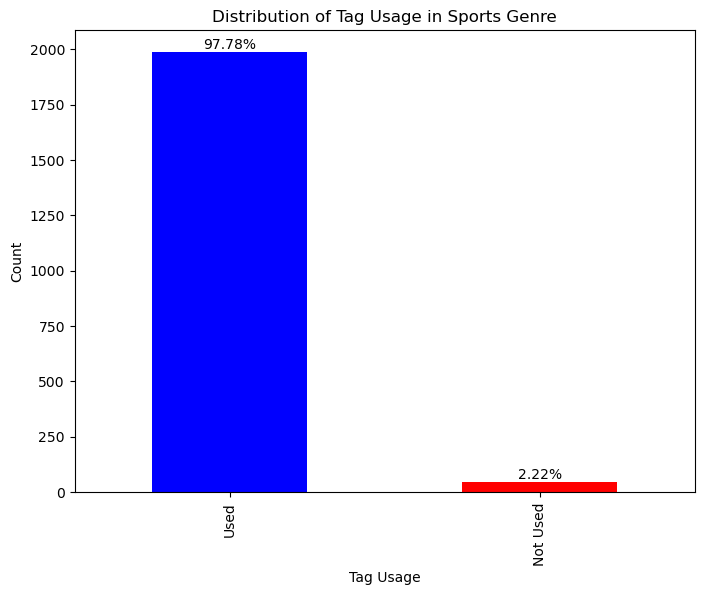

In [472]:

tag_usage_counts = dfSport['TagUsage'].value_counts()


tag_usage_percentages = tag_usage_counts / tag_usage_counts.sum() * 100


custom_colors = ['blue', 'red']

plt.figure(figsize=(8, 6))
ax = tag_usage_counts.plot(kind='bar', color=custom_colors)
plt.title('Distribution of Tag Usage in Sports Genre')
plt.xlabel('Tag Usage')
plt.ylabel('Count')

for i, v in enumerate(tag_usage_counts):
    ax.text(i, v, f'{tag_usage_percentages[i]:.2f}%', ha='center', va='bottom')

# Show the chart
plt.show()

People & Blogs

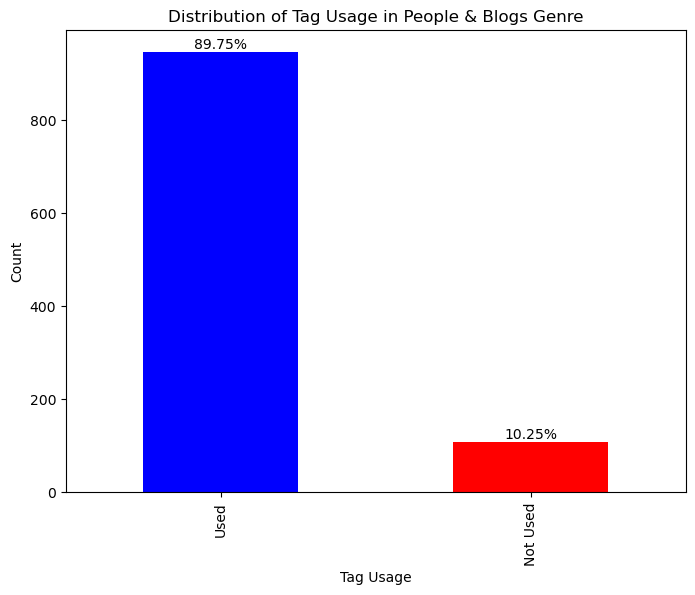

In [473]:
# Count the frequencies of each unique value in the 'TagUsage' column
tag_usage_counts = dfPpl['TagUsage'].value_counts()

# Calculate the percentage for each 'TagUsage' category
tag_usage_percentages = tag_usage_counts / tag_usage_counts.sum() * 100

# Define custom colors for each 'TagUsage'
custom_colors = ['blue', 'red']

# Create a bar chart with custom colors and annotations for percentages
plt.figure(figsize=(8, 6))
ax = tag_usage_counts.plot(kind='bar', color=custom_colors)
plt.title('Distribution of Tag Usage in People & Blogs Genre')
plt.xlabel('Tag Usage')
plt.ylabel('Count')

# Annotate the bars with percentages
for i, v in enumerate(tag_usage_counts):
    ax.text(i, v, f'{tag_usage_percentages[i]:.2f}%', ha='center', va='bottom')

# Show the chart
plt.show()

Games

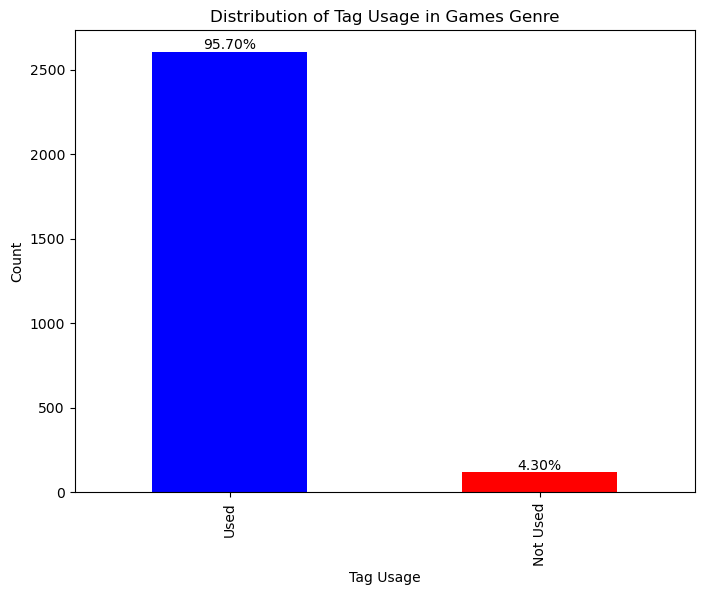

In [474]:
# Count the frequencies of each unique value in the 'TagUsage' column
tag_usage_counts = dfGame['TagUsage'].value_counts()

# Calculate the percentage for each 'TagUsage' category
tag_usage_percentages = tag_usage_counts / tag_usage_counts.sum() * 100

# Define custom colors for each 'TagUsage'
custom_colors = ['blue', 'red']

# Create a bar chart with custom colors and annotations for percentages
plt.figure(figsize=(8, 6))
ax = tag_usage_counts.plot(kind='bar', color=custom_colors)
plt.title('Distribution of Tag Usage in Games Genre')
plt.xlabel('Tag Usage')
plt.ylabel('Count')

# Annotate the bars with percentages
for i, v in enumerate(tag_usage_counts):
    ax.text(i, v, f'{tag_usage_percentages[i]:.2f}%', ha='center', va='bottom')

# Show the chart
plt.show()

**Finding the correlation between tags and views, likes, dislikes**

Sports

In [475]:
filtered_df = dfSport[(dfSport['top_10_percent_count'] != 0)]

correlation_view = filtered_df['view_count'].corr(filtered_df['top_10_percent_count'])
correlation_like = filtered_df['top_10_percent_count'].corr(filtered_df['likes'])
correlation_dislike = filtered_df['top_10_percent_count'].corr(filtered_df['dislikes'])

print(f"Correlation between 'top_10_percent_count' and 'view_count': {correlation_view:.2f}")
print(f"Correlation between 'top_10_percent_count' and 'likes': {correlation_like:.2f}")
print(f"Correlation between 'top_10_percent_count' and 'dislikes': {correlation_dislike:.2f}")

Correlation between 'top_10_percent_count' and 'view_count': 0.05
Correlation between 'top_10_percent_count' and 'likes': 0.09
Correlation between 'top_10_percent_count' and 'dislikes': 0.03


Games

In [476]:
filtered_df = dfGame[(dfGame['top_10_percent_count'] != 0)]

correlation_view = filtered_df['view_count'].corr(filtered_df['top_10_percent_count'])
correlation_like = filtered_df['top_10_percent_count'].corr(filtered_df['likes'])
correlation_dislike = filtered_df['top_10_percent_count'].corr(filtered_df['dislikes'])

print(f"Correlation between 'top_10_percent_count' and 'view_count': {correlation_view:.2f}")
print(f"Correlation between 'top_10_percent_count' and 'likes': {correlation_like:.2f}")
print(f"Correlation between 'top_10_percent_count' and 'dislikes': {correlation_dislike:.2f}")

Correlation between 'top_10_percent_count' and 'view_count': 0.07
Correlation between 'top_10_percent_count' and 'likes': 0.08
Correlation between 'top_10_percent_count' and 'dislikes': 0.06


People & Blogs

In [477]:
filtered_df = dfPpl[(dfPpl['top_10_percent_count'] != 0)]

correlation_view = filtered_df['view_count'].corr(filtered_df['top_10_percent_count'])
correlation_like = filtered_df['top_10_percent_count'].corr(filtered_df['likes'])
correlation_dislike = filtered_df['top_10_percent_count'].corr(filtered_df['dislikes'])

print(f"Correlation between 'top_10_percent_count' and 'view_count': {correlation_view:.2f}")
print(f"Correlation between 'top_10_percent_count' and 'likes': {correlation_like:.2f}")
print(f"Correlation between 'top_10_percent_count' and 'dislikes': {correlation_dislike:.2f}")

Correlation between 'top_10_percent_count' and 'view_count': 0.11
Correlation between 'top_10_percent_count' and 'likes': 0.09
Correlation between 'top_10_percent_count' and 'dislikes': 0.01


In [478]:
## Corelation between Tags and reaction (Likes and Dislikes)
correlation_GameTagLikeDislike = dfGame['top_10_percent_count'].corr(dfGame['LikesDislikeSum'])

correlation_SportTagLikeDislike = dfSport['top_10_percent_count'].corr(dfSport['LikesDislikeSum'])

correlation_PeopleTagLikeDislike = dfPpl['top_10_percent_count'].corr(dfPpl['LikesDislikeSum'])

# Display the correlations
print(f"Correlation between 'top_10_percent_count' and 'LikesDislikeSum	': {correlation_GameTagLikeDislike:.2f}")
print(f"Correlation between 'top_10_percent_count' and 'LikesDislikeSum	': {correlation_SportTagLikeDislike:.2f}")
print(f"Correlation between 'top_10_percent_count' and 'LikesDislikeSum	': {correlation_PeopleTagLikeDislike:.2f}")


Correlation between 'top_10_percent_count' and 'LikesDislikeSum	': 0.09
Correlation between 'top_10_percent_count' and 'LikesDislikeSum	': 0.09
Correlation between 'top_10_percent_count' and 'LikesDislikeSum	': 0.09


Since there is no deep correlation between the videos' tags and the views likes and dislikes, the videos' success is **not** dependent by this research

## Exploring Relationship in Videos by the Video Title ##

**Finding the Correlation Between Video Title Lenght and View Count**

In [479]:
# Add a new column for title length
df['title_length'] = df['title'].apply(len)

# Calculate the correlation between title length and view count
correlation = df['title_length'].corr(df['view_count'])

# Print the correlation value
print(f"Correlation between Title Length and View Count: {correlation:.2f}")

Correlation between Title Length and View Count: -0.04


There is **no** correlation

**Resetting All Dataframes**

In [480]:
dfSport = df[df['categoryName'] == 'Sports']

dfSport=dfSport.drop(['comment_count', 'ratings_disabled','description','publishedAt','trending_date','comments_disabled','tags'], axis=1)

dfSport.head(2)

,title,channelTitle,view_count,likes,dislikes,categoryName,cleaned_title,title_length
40,Shannon reacts to Kyle Kuzma's game-winning sh...,Skip and Shannon: UNDISPUTED,2895011,36854,1576,Sports,shannon reacts kyle kuzmas gamewinning shot im...,100
43,Giannis Gets Ejected After Headbutting Mo Wagner,Bleacher Report,4220439,39880,1977,Sports,giannis gets ejected headbutting mo wagner,48


**Counting All Words From The Cleaned Title Colum**

In [481]:
dfSport['LikesDislikeSum']=dfSport['likes'] + dfSport['dislikes']

In [482]:
column_list = dfSport['cleaned_title'].tolist()

column_list = [string.split() for string in column_list]

flat_list = [word for sublist in column_list for word in sublist]

word_counts = Counter(flat_list)


**Creating Dataframes Showing the Frequency of Words**

In [483]:
# Create a DataFrame to store the tag names and their frequencies
title_frequencies_df = pd.DataFrame(word_counts.items(), columns=['Title', 'Frequency'])

# Sort the DataFrame by frequency in descending order
title_frequencies_df = title_frequencies_df.sort_values(by='Frequency', ascending=False)

# Reset the index of the DataFrame
title_frequencies_df = title_frequencies_df.reset_index(drop=True)
title_frequencies_df

,Title,Frequency
0,highlights,777
1,vs,586
2,game,261
3,full,218
4,sports,191
...,...,...
3889,lightning,1
3890,airbnb,1
3891,workshop,1
3892,raise,1


**Determining the top 10% Most Frequent Title Words and Getting Rid of Frequencies of 1**

In [484]:
# Calculate the total number of unique tags
total_unique_title = len(title_frequencies_df)

# Calculate the top 10% threshold
top_10_percent = int(total_unique_title * 0.10)

# Filter the tags to get the top 10% most frequent tags
top_10_percent_titles = title_frequencies_df.head(top_10_percent)

# Remove tags with a frequency of 1
top_10_percent_titles = top_10_percent_titles[top_10_percent_titles['Frequency'] != 1]

# Reset the index of the DataFrame
top_10_percent_titles = top_10_percent_titles.reset_index(drop=True)
top_10_percent_titles

,Title,Frequency
0,highlights,777
1,vs,586
2,game,261
3,full,218
4,sports,191
...,...,...
384,back,8
385,penalties,8
386,go,8
387,epic,8


**Determining if a Top 10% Word Has Been Used**

In [485]:
# Create a set of the top 10% most frequent words
top_10_percent_words_set = set(top_10_percent_titles['Title'])

# Function to check if any word from the top 10% is present in the cleaned titles
def contains_top_words(title):
    title = title.lower()  
    words = title.split()
    for word in words:
        if word in top_10_percent_words_set:
            return 'Used'
    return 'Not Used'

# Apply the function to the 'cleaned_title' column of the DataFrame
dfSport['top_words_usage'] = dfSport['cleaned_title'].apply(contains_top_words)

# Count the occurrences of "Used" and "Not Used" in the 'top_words_usage' column
usage_counts = dfSport['top_words_usage'].value_counts()

# Display the counts
print(usage_counts)

Used        2004
Not Used      64
Name: top_words_usage, dtype: int64


**Counting the Frequencies Used of the Top 10%**

In [486]:
def count_top_words(title):
    count = 0
    words = title.split()
    for word in words:
        if word in top_10_percent_titles['Title'].values:
            count += 1
    return count

dfSport['top_10_percent_count'] = dfSport['cleaned_title'].apply(count_top_words)
dfSport.head(4)

,title,channelTitle,view_count,likes,dislikes,categoryName,cleaned_title,title_length,LikesDislikeSum,top_words_usage,top_10_percent_count
40,Shannon reacts to Kyle Kuzma's game-winning sh...,Skip and Shannon: UNDISPUTED,2895011,36854,1576,Sports,shannon reacts kyle kuzmas gamewinning shot im...,100,38430,Used,7
43,Giannis Gets Ejected After Headbutting Mo Wagner,Bleacher Report,4220439,39880,1977,Sports,giannis gets ejected headbutting mo wagner,48,41857,Used,2
47,TRAIL BLAZERS at MAVERICKS | FULL GAME HIGHLIG...,NBA,5614024,55571,2181,Sports,trail blazers mavericks full game highlights a...,67,57752,Used,7
65,'Don't mess with Dame Dolla' - Stephen A. reac...,ESPN,4924550,76290,2022,Sports,dont mess dame dolla stephen reacts lillards b...,96,78312,Used,6


**Creating a Graph to See Theq Frequency of Words**

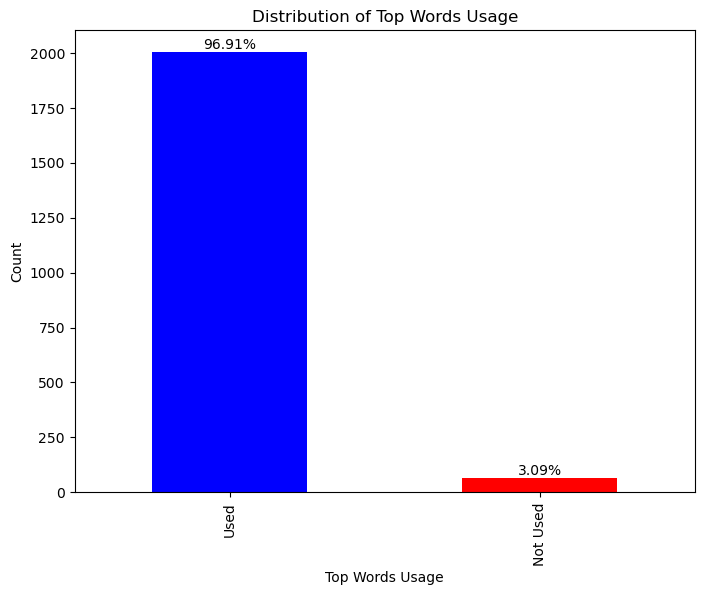

In [487]:
# Calculate the frequencies of 'top_words_usage' values
top_words_usage_counts = dfSport['top_words_usage'].value_counts()

# Calculate the percentage for each 'top_words_usage' category
top_words_usage_percentages = top_words_usage_counts / top_words_usage_counts.sum() * 100

# Define custom colors for the bars
custom_colors = ['blue', 'red']

# Create a bar chart with custom colors and annotations for percentages
plt.figure(figsize=(8, 6))
ax = top_words_usage_counts.plot(kind='bar', color=custom_colors)
plt.title('Distribution of Top Words Usage')
plt.xlabel('Top Words Usage')
plt.ylabel('Count')

# Annotate the bars with percentages
for i, v in enumerate(top_words_usage_counts):
    ax.text(i, v, f'{top_words_usage_percentages[i]:.2f}%', ha='center', va='bottom')

# Show the chart
plt.show()

**Finding the Correlation Between the Top 10% Most Frequent Words and Views, Likes, Dislikes**

In [488]:


correlation_view = dfSport['top_10_percent_count'].corr(dfSport['view_count'])
correlation_likes = dfSport['top_10_percent_count'].corr(dfSport['likes'])
correlation_dislikes = dfSport['top_10_percent_count'].corr(dfSport['dislikes'])
correlation_length = dfSport['title_length'].corr(dfSport['dislikes'])

# Display the correlations
print(f"Correlation between 'top_10_percent_count' and 'view_count': {correlation_view:.2f}")
print(f"Correlation between 'top_10_percent_count' and 'likes': {correlation_likes:.2f}")
print(f"Correlation between 'top_10_percent_count' and 'dislikes': {correlation_dislikes:.2f}")


Correlation between 'top_10_percent_count' and 'view_count': -0.02
Correlation between 'top_10_percent_count' and 'likes': -0.13
Correlation between 'top_10_percent_count' and 'dislikes': -0.00


In [489]:

correlation_SportTitleLikeDislike = dfSport['top_10_percent_count'].corr(dfSport['LikesDislikeSum'])

# Display the correlations

print(f"Correlation between 'top_10_percent_count' and 'LikesDislikeSum': {correlation_SportTitleLikeDislike:.2f}")


Correlation between 'top_10_percent_count' and 'LikesDislikeSum': -0.12


Ther is **no** Correlation

**Most Watched Channels**

In [490]:

dfsports_sorted = dfSport.sort_values(by='view_count', ascending=False)


total_rows = len(dfsports_sorted)


top_10_percent = int(total_rows * 0.10)


top_10_percent_channels = dfsports_sorted.head(top_10_percent)


In [491]:
top_10_percent_channels

,title,channelTitle,view_count,likes,dislikes,categoryName,cleaned_title,title_length,LikesDislikeSum,top_words_usage,top_10_percent_count
31191,"India claim stunning series win, end Australia...",cricket.com.au,1201206446,26718566,831123,Sports,india claim stunning series win end australias...,92,27549689,Used,4
59565,Floyd Mayweather vs Logan Paul: Fight goes the...,CBS Sports HQ,554989292,4911012,763923,Sports,floyd mayweather vs logan paul fight goes dist...,91,5674935,Used,12
89172,Highlights: Manchester United 0-5 Liverpool | ...,Liverpool FC,367867655,6367118,264316,Sports,highlights manchester united liverpool salah h...,80,6631434,Used,4
35183,The Weeknd’s FULL Pepsi Super Bowl LV Halftime...,NFL,202743381,8598477,430443,Sports,weeknds full pepsi super bowl lv halftime show,51,9028920,Used,5
22793,Pandya's power seals series win for India with...,cricket.com.au,198564797,4194828,144978,Sports,pandyas power seals series win india epic chas...,83,4339806,Used,5
...,...,...,...,...,...,...,...,...,...,...,...
82162,PARIS SAINT-GERMAIN - OLYMPIQUE LYONNAIS (2 - ...,Ligue 1 Uber Eats Official,18225180,253555,9901,Sports,paris saintgermain olympique lyonnais highligh...,86,263456,Used,4
48982,BEN ASKREN IMMEDIATE REACTION TO KNOCKOUT LOSS...,FightHype.com,18176277,218842,12773,Sports,ben askren immediate reaction knockout loss ja...,77,231615,Used,8
46385,Gonzaga vs. UCLA - Final Four NCAA tournament ...,March Madness,18100678,142333,11229,Sports,gonzaga vs ucla final four ncaa tournament ext...,65,153562,Used,6
77951,Jake Paul vs Tyron Woodley: Paul wins via spli...,CBS Sports HQ,18079623,126601,25912,Sports,jake paul vs tyron woodley paul wins via split...,96,152513,Used,12


In [492]:
channel_stats = dfSport.groupby('channelTitle').agg({
    'view_count': 'sum',
    'dislikes': 'sum',
    'likes': 'sum'
    
}).reset_index()

# Display the resulting DataFrame
channel_stats

,channelTitle,view_count,dislikes,likes
0,2HYPE,31315931,32464,1735715
1,ACC Digital Network,2687290,1075,24568
2,AFTV,21427427,42711,784352
3,ARMWRESTLING TV,18359400,7824,324271
4,Alabama Crimson Tide on AL.com,2966062,1058,40157
...,...,...,...,...
331,cricket.com.au,1688801931,1207213,36397941
332,dodgerfilms,7192013,2713,205290
333,kenanK TV,2218478,2302,2166
334,nbagleague,9297919,2546,85134


In [493]:
channel_stats['likesdislikedsum']=channel_stats['likes'] + channel_stats['dislikes']
channel_stats['ldsumdivviews']=channel_stats['likesdislikedsum'] / channel_stats['view_count']
channel_stats['likestotal']=channel_stats['likes'] / channel_stats['likesdislikedsum']
channel_stats['dislikestotal']=channel_stats['dislikes'] / channel_stats['likesdislikedsum']
channel_stats.head(100)

,channelTitle,view_count,dislikes,likes,likesdislikedsum,ldsumdivviews,likestotal,dislikestotal
0,2HYPE,31315931,32464,1735715,1768179,0.056463,0.981640,0.018360
1,ACC Digital Network,2687290,1075,24568,25643,0.009542,0.958078,0.041922
2,AFTV,21427427,42711,784352,827063,0.038598,0.948358,0.051642
3,ARMWRESTLING TV,18359400,7824,324271,332095,0.018089,0.976440,0.023560
4,Alabama Crimson Tide on AL.com,2966062,1058,40157,41215,0.013896,0.974330,0.025670
...,...,...,...,...,...,...,...,...
95,FloBikes,31811321,8793,125766,134559,0.004230,0.934653,0.065347
96,Foolish Baseball,2545877,1413,146489,147902,0.058095,0.990446,0.009554
97,Football Daily,1127546,1245,27329,28574,0.025342,0.956429,0.043571
98,Fore Play Golf,3810837,821,54837,55658,0.014605,0.985249,0.014751


In [494]:
correlation_viewlike = channel_stats['likes'].corr(channel_stats['view_count'])

# Display the correlations
print(f"Correlation between 'top_10_percent_count' and 'view_count': {correlation_viewlike:.2f}")


Correlation between 'top_10_percent_count' and 'view_count': 0.90


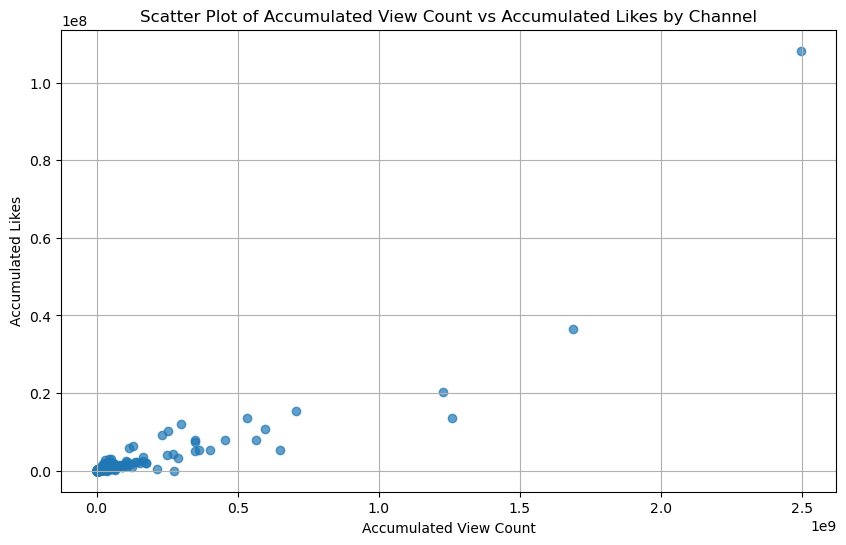

Correlation between 'view_count' and 'likes': 0.90


In [495]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(channel_stats['view_count'], channel_stats['likes'], alpha=0.7)
plt.title('Scatter Plot of Accumulated View Count vs Accumulated Likes by Channel')
plt.xlabel('Accumulated View Count')
plt.ylabel('Accumulated Likes')
plt.grid(True)
plt.show()

# Calculate the correlation coefficient
correlation = channel_stats['view_count'].corr(channel_stats['likes'])
print(f"Correlation between 'view_count' and 'likes': {correlation:.2f}")

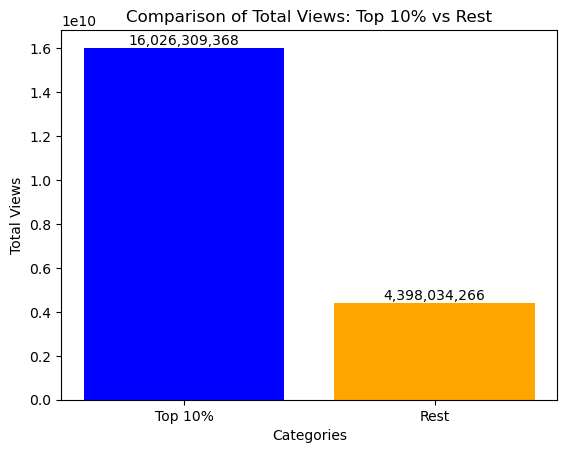

In [496]:
# Calculate the total views for each channel
channel_stats['total_views'] = channel_stats['view_count'] + channel_stats['dislikes'] + channel_stats['likes']

# Calculate the top 10 percent threshold
top_10_percent_threshold = channel_stats['total_views'].quantile(0.9)

# Create a column indicating whether each channel is in the top 10 percent
channel_stats['top_10_percent'] = channel_stats['total_views'] >= top_10_percent_threshold

# Calculate the total views for the top 10 percent channels
total_views_top_10_percent = channel_stats[channel_stats['top_10_percent']]['total_views'].sum()

# Calculate the total views for the rest of the channels
total_views_rest = channel_stats[~channel_stats['top_10_percent']]['total_views'].sum()

# Create a bar chart to compare total views
labels = ['Top 10%', 'Rest']
total_views = [total_views_top_10_percent, total_views_rest]

fig, ax = plt.subplots()

bars = ax.bar(labels, total_views, color=['blue', 'orange'])

# Annotate the bars with the total views
for bar, total_views in zip(bars, total_views):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{total_views:,}', ha='center', va='bottom')

plt.title('Comparison of Total Views: Top 10% vs Rest')
plt.xlabel('Categories')
plt.ylabel('Total Views')
plt.show()

# Drop the temporary columns
channel_stats.drop(['total_views', 'top_10_percent'], axis=1, inplace=True)

**Exploring Enabled/Disabled Comments on Videos**

Creating dfs for enabled and disabled videos

In [497]:
df = pd.read_csv(r'c:\YoutubeProject\US_youtube_trending_data.csv')

# Remove the 'thumbnail_link' column
df.drop('thumbnail_link', axis=1, inplace=True)

# Remove the 'video_id' column
df.drop('video_id', axis=1, inplace=True)

# Remove the 'channelId' column
df.drop('channelId', axis=1, inplace=True)

df = df[(df['dislikes'] != 0) | ((df['dislikes'] == 0) & (df['likes'] == 0))]

df = df[(df['view_count'] != 0)]

df= df[df['tags']!= '[none]']

aggregation = {
    'view_count': 'sum',
    'likes': 'sum',
    'dislikes': 'sum',
    'comment_count': 'sum'
}


aggregated_df = df.groupby('title').agg(aggregation).reset_index()


df = pd.merge(df.drop(['view_count', 'likes', 'dislikes', 'comment_count'], axis=1), aggregated_df, on='title', how='left')

df = df.drop_duplicates()
df = df.drop_duplicates(subset='title')


In [498]:



df_comments_disabled= df[df['comments_disabled'] == True]

df_comments_enabled= df[df['comments_disabled'] == False]


df_comments_disabled=df_comments_disabled.drop(['tags','channelTitle','ratings_disabled','description','publishedAt','trending_date'], axis=1)

df_comments_enabled=df_comments_enabled.drop(['tags','channelTitle','ratings_disabled','description','publishedAt','trending_date'], axis=1)

df_comments_disabled


,title,categoryId,comments_disabled,view_count,likes,dislikes,comment_count
53,FIRST DAY IN THE NEW HOUSE! Ellie and Jared Mo...,22,True,994243,39862,946,0
131,AN UMBRELLA ACADEMY UNBOXING,24,True,3995738,419569,5193,0
134,LaBrant Family Baby Boy Name Reveal.,22,True,18147133,878531,15553,0
242,First Day of School GRWM + Vlog | College Edit...,26,True,1238421,77775,930,0
816,IMPORTANT NEWS ABOUT ANNABELLE “ ESCAPING “,24,True,9031905,279963,6241,0
...,...,...,...,...,...,...,...
99243,FINAL FANTASY XIV: DAWNTRAIL Teaser Trailer,20,True,5422276,0,0,0
99268,DRAGON BALL LEGENDS REVEALS ＆ STUFF #30,20,True,2283885,0,0,0
99278,2023 DOKKAN NOW! SPECIAL (English),20,True,1176789,0,0,0
99286,TVアニメ『呪術廻戦』第2期「渋谷事変」ノンクレジットOPムービー／OPテーマ：King G...,1,True,83462816,0,0,0


**10% Best Performing**

In [499]:

df_comments_disabled = df_comments_disabled.sort_values(by='view_count', ascending=False)

df_comments_disabled31 = df_comments_disabled.head(31)

In [500]:
#For best performing if comments are enabled

df_comments_enabled = df_comments_enabled.sort_values(by='view_count', ascending=False)

df_comments_enabled31 = df_comments_enabled.head(31)

df_comments_enabled31

,title,categoryId,comments_disabled,view_count,likes,dislikes,comment_count
66370,Turn into orbeez - Tutorial #Shorts,24,False,5640301234,189617847,6167736,74974
86946,Adele - Easy On Me (Official Video),10,False,1760774068,70482598,790723,3821932
76751,SPIDER-MAN: NO WAY HOME - Official Teaser Trai...,24,False,1471277143,63080849,430664,3818828
86577,My hidden talent #shorts,23,False,1452140141,47131264,944115,82208
1800,BTS (방탄소년단) 'Dynamite' Official MV,10,False,1388564083,107183079,4268039,41666309
3200,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,10,False,1233082942,91799816,6739558,23191061
31191,"India claim stunning series win, end Australia...",17,False,1201206446,26718566,831123,1737039
7401,Justin Bieber - Holy ft. Chance The Rapper,10,False,1128673006,64422566,1592104,4807202
85393,Dice Stacks from $1 to $100,17,False,1101102782,76139711,1235502,236629
19791,BTS (방탄소년단) 'Life Goes On' Official MV,10,False,948783380,78747280,693748,30055631


In [501]:
#Enabled
e_correlation_ViewLike = df_comments_enabled31['likes'].corr(df_comments_enabled31['view_count'])
e_correlation_ViewDislike = df_comments_enabled31['dislikes'].corr(df_comments_enabled31['view_count'])
e_correlation_LikesDislike = df_comments_enabled31['likes'].corr(df_comments_enabled31['dislikes'])

#Disabled
d_correlation_ViewLike = df_comments_disabled31['likes'].corr(df_comments_disabled31['view_count'])
d_correlation_ViewDislike = df_comments_disabled31['dislikes'].corr(df_comments_disabled31['view_count'])
d_correlation_LikesDislike = df_comments_disabled31['likes'].corr(df_comments_disabled31['dislikes'])

# Display the correlations
print('For Comments Enabled')
print(f"Correlation between 'likes' and 'view_count': {e_correlation_ViewLike:.2f}")
print(f"Correlation between 'dislikes' and 'view_count': {e_correlation_ViewDislike:.2f}")
print(f"Correlation between 'likes' and 'dislikes': {e_correlation_LikesDislike:.2f}")

print('\nFor Comments Disabled')
print(f"Correlation between 'likes' and 'view_count': {d_correlation_ViewLike:.2f}")
print(f"Correlation between 'dislikes' and 'view_count': {d_correlation_ViewDislike:.2f}")
print(f"Correlation between 'likes' and 'dislikes': {d_correlation_LikesDislike:.2f}")

For Comments Enabled
Correlation between 'likes' and 'view_count': 0.83
Correlation between 'dislikes' and 'view_count': 0.67
Correlation between 'likes' and 'dislikes': 0.72

For Comments Disabled
Correlation between 'likes' and 'view_count': 0.51
Correlation between 'dislikes' and 'view_count': 0.82
Correlation between 'likes' and 'dislikes': 0.65


In [502]:
viewsTotalDisabled = df_comments_disabled31['view_count'].sum()
viewsTotalEnabled = df_comments_enabled31['view_count'].sum()

likesTotalDisabled = df_comments_disabled31['likes'].sum()
likesTotalEnabled = df_comments_enabled31['likes'].sum()

dislikesTotalDisabled = df_comments_disabled31['dislikes'].sum()
dilikesTotalEnabled = df_comments_enabled31['dislikes'].sum()

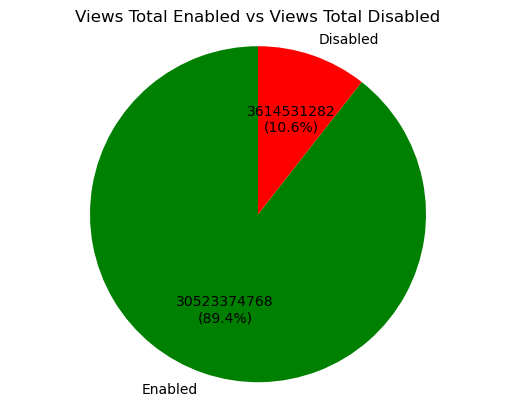

In [503]:
viewsTotalEnabled = viewsTotalEnabled
viewsTotalDisabled = viewsTotalDisabled

# Data
labels = ['Enabled', 'Disabled']
values = [viewsTotalEnabled, viewsTotalDisabled]

# Plotting the pie chart with actual values
plt.pie(values, labels=labels, autopct=lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(values) / 100, p), startangle=90, colors=['green', 'red'])

# Equal aspect ratio ensures that the pie chart is circular
plt.axis('equal')

# Adding a title
plt.title('Views Total Enabled vs Views Total Disabled')

# Display the pie chart
plt.show()

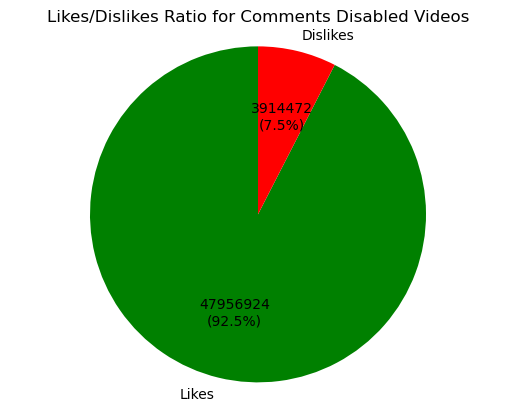

In [504]:
likesTotalDisabled = likesTotalDisabled
dislikesTotalDisabled = dislikesTotalDisabled

# Data
labels = ['Likes', 'Dislikes']
values = [likesTotalDisabled, dislikesTotalDisabled]

# Plotting the pie chart with actual values
plt.pie(values, labels=labels, autopct=lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(values) / 100, p), startangle=90, colors=['green', 'red'])

# Equal aspect ratio ensures that the pie chart is circular
plt.axis('equal')

# Adding a title
plt.title('Likes/Dislikes Ratio for Comments Disabled Videos')

# Display the pie chart
plt.show()

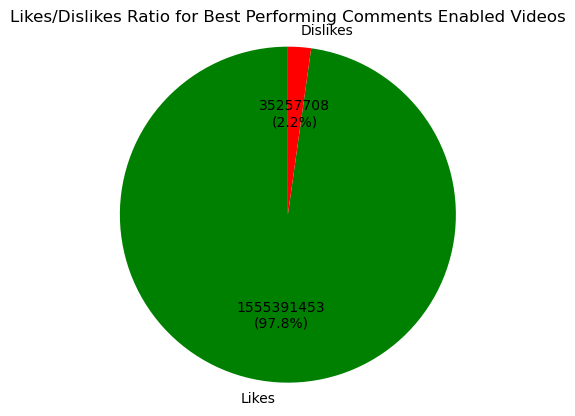

In [505]:
likesTotalEnabled = likesTotalEnabled
dilikesTotalEnabled = dilikesTotalEnabled

# Data
labels = ['Likes', 'Dislikes']
values = [likesTotalEnabled, dilikesTotalEnabled]

# Plotting the pie chart with actual values
plt.pie(values, labels=labels, autopct=lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(values) / 100, p), startangle=90, colors=['green', 'red'])

# Equal aspect ratio ensures that the pie chart is circular
plt.axis('equal')

# Adding a title
plt.title('Likes/Dislikes Ratio for Best Performing Comments Enabled Videos')

# Display the pie chart
plt.show()

**10% Worst Performing**

In [506]:
df_comments_disabled31 = df_comments_disabled.tail(31)
df_comments_enabled31 = df_comments_enabled.tail(31)

In [507]:
#Enabled
e_correlation_ViewLike = df_comments_enabled31['likes'].corr(df_comments_enabled31['view_count'])
e_correlation_ViewDislike = df_comments_enabled31['dislikes'].corr(df_comments_enabled31['view_count'])
e_correlation_LikesDislike = df_comments_enabled31['likes'].corr(df_comments_enabled31['dislikes'])

#Disabled
d_correlation_ViewLike = df_comments_disabled31['likes'].corr(df_comments_disabled31['view_count'])
d_correlation_ViewDislike = df_comments_disabled31['dislikes'].corr(df_comments_disabled31['view_count'])
d_correlation_LikesDislike = df_comments_disabled31['likes'].corr(df_comments_disabled31['dislikes'])

# Display the correlations
print('For Comments Enabled')
print(f"Correlation between 'likes' and 'view_count': {e_correlation_ViewLike:.2f}")
print(f"Correlation between 'dislikes' and 'view_count': {e_correlation_ViewDislike:.2f}")
print(f"Correlation between 'likes' and 'dislikes': {e_correlation_LikesDislike:.2f}")

print('\nFor Comments Disabled')
print(f"Correlation between 'likes' and 'view_count': {d_correlation_ViewLike:.2f}")
print(f"Correlation between 'dislikes' and 'view_count': {d_correlation_ViewDislike:.2f}")
print(f"Correlation between 'likes' and 'dislikes': {d_correlation_LikesDislike:.2f}")

For Comments Enabled
Correlation between 'likes' and 'view_count': 0.17
Correlation between 'dislikes' and 'view_count': 0.04
Correlation between 'likes' and 'dislikes': 0.07

For Comments Disabled
Correlation between 'likes' and 'view_count': 0.16
Correlation between 'dislikes' and 'view_count': 0.29
Correlation between 'likes' and 'dislikes': 0.40


In [508]:
viewsTotalDisabled = df_comments_disabled31['view_count'].sum()
viewsTotalEnabled = df_comments_enabled31['view_count'].sum()

likesTotalDisabled = df_comments_disabled31['likes'].sum()
likesTotalEnabled = df_comments_enabled31['likes'].sum()

dislikesTotalDisabled = df_comments_disabled31['dislikes'].sum()
dilikesTotalEnabled = df_comments_enabled31['dislikes'].sum()

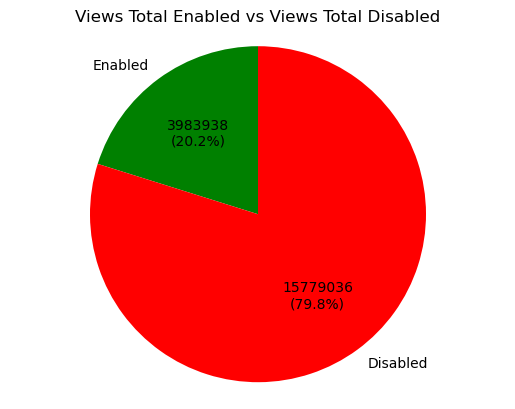

In [509]:
viewsTotalEnabled = viewsTotalEnabled
viewsTotalDisabled = viewsTotalDisabled

# Data
labels = ['Enabled', 'Disabled']
values = [viewsTotalEnabled, viewsTotalDisabled]

# Plotting the pie chart with actual values
plt.pie(values, labels=labels, autopct=lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(values) / 100, p), startangle=90, colors=['green', 'red'])

# Equal aspect ratio ensures that the pie chart is circular
plt.axis('equal')

# Adding a title
plt.title('Views Total Enabled vs Views Total Disabled')

# Display the pie chart
plt.show()

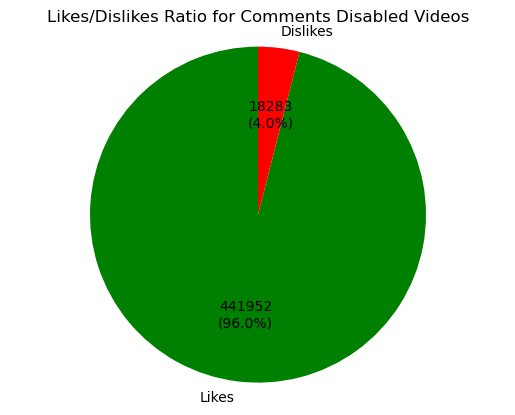

In [510]:
likesTotalDisabled = likesTotalDisabled
dislikesTotalDisabled = dislikesTotalDisabled

# Data
labels = ['Likes', 'Dislikes']
values = [likesTotalDisabled, dislikesTotalDisabled]

# Plotting the pie chart with actual values
plt.pie(values, labels=labels, autopct=lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(values) / 100, p), startangle=90, colors=['green', 'red'])

# Equal aspect ratio ensures that the pie chart is circular
plt.axis('equal')

# Adding a title
plt.title('Likes/Dislikes Ratio for Comments Disabled Videos')

# Display the pie chart
plt.show()

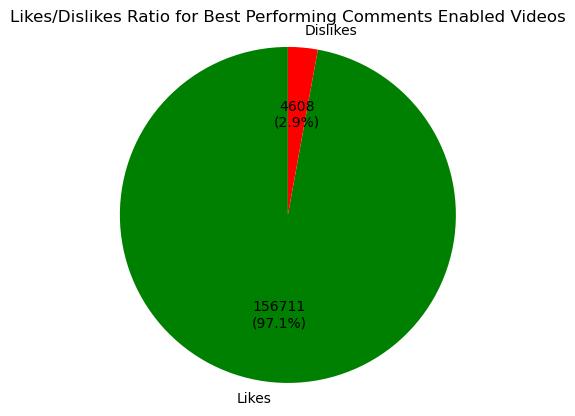

In [511]:
likesTotalEnabled = likesTotalEnabled
dilikesTotalEnabled = dilikesTotalEnabled

# Data
labels = ['Likes', 'Dislikes']
values = [likesTotalEnabled, dilikesTotalEnabled]

# Plotting the pie chart with actual values
plt.pie(values, labels=labels, autopct=lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(values) / 100, p), startangle=90, colors=['green', 'red'])

# Equal aspect ratio ensures that the pie chart is circular
plt.axis('equal')

# Adding a title
plt.title('Likes/Dislikes Ratio for Best Performing Comments Enabled Videos')

# Display the pie chart
plt.show()

**Comparison Between All Disabled and Enabled Best Performing**

In [512]:
#For best performing if comments are enabled

df_comments_enabled = df_comments_enabled.sort_values(by='view_count', ascending=False)

df_comments_enabled = df_comments_enabled.head(317)

df_comments_enabled

,title,categoryId,comments_disabled,view_count,likes,dislikes,comment_count
66370,Turn into orbeez - Tutorial #Shorts,24,False,5640301234,189617847,6167736,74974
86946,Adele - Easy On Me (Official Video),10,False,1760774068,70482598,790723,3821932
76751,SPIDER-MAN: NO WAY HOME - Official Teaser Trai...,24,False,1471277143,63080849,430664,3818828
86577,My hidden talent #shorts,23,False,1452140141,47131264,944115,82208
1800,BTS (방탄소년단) 'Dynamite' Official MV,10,False,1388564083,107183079,4268039,41666309
...,...,...,...,...,...,...,...
30186,"I Hid $100,000 On The Dream SMP!",20,False,112308940,5446559,86104,445319
22208,India hold their nerve to win ODI epic in Canb...,17,False,112194368,1955785,93483,75275
35985,Taylor Swift - Love Story (Taylor’s Version) [...,10,False,112170470,10047897,63190,848563
72390,ASTRO 아스트로 - After Midnight M/V,24,False,112088357,1787364,14653,421689


In [513]:
#Enabled
e_correlation_ViewLike = df_comments_enabled['likes'].corr(df_comments_enabled['view_count'])
e_correlation_ViewDislike = df_comments_enabled['dislikes'].corr(df_comments_enabled['view_count'])
e_correlation_LikesDislike = df_comments_enabled['likes'].corr(df_comments_enabled['dislikes'])

#Disabled
d_correlation_ViewLike = df_comments_disabled['likes'].corr(df_comments_disabled['view_count'])
d_correlation_ViewDislike = df_comments_disabled['dislikes'].corr(df_comments_disabled['view_count'])
d_correlation_LikesDislike = df_comments_disabled['likes'].corr(df_comments_disabled['dislikes'])

# Display the correlations
print('For Comments Enabled')
print(f"Correlation between 'likes' and 'view_count': {e_correlation_ViewLike:.2f}")
print(f"Correlation between 'dislikes' and 'view_count': {e_correlation_ViewDislike:.2f}")
print(f"Correlation between 'likes' and 'dislikes': {e_correlation_LikesDislike:.2f}")

print('\nFor Comments Disabled')
print(f"Correlation between 'likes' and 'view_count': {d_correlation_ViewLike:.2f}")
print(f"Correlation between 'dislikes' and 'view_count': {d_correlation_ViewDislike:.2f}")
print(f"Correlation between 'likes' and 'dislikes': {d_correlation_LikesDislike:.2f}")

For Comments Enabled
Correlation between 'likes' and 'view_count': 0.84
Correlation between 'dislikes' and 'view_count': 0.74
Correlation between 'likes' and 'dislikes': 0.73

For Comments Disabled
Correlation between 'likes' and 'view_count': 0.67
Correlation between 'dislikes' and 'view_count': 0.84
Correlation between 'likes' and 'dislikes': 0.73


In [514]:
viewsTotalDisabled = df_comments_disabled['view_count'].sum()
viewsTotalEnabled = df_comments_enabled['view_count'].sum()

likesTotalDisabled = df_comments_disabled['likes'].sum()
likesTotalEnabled = df_comments_enabled['likes'].sum()

dislikesTotalDisabled = df_comments_disabled['dislikes'].sum()
dilikesTotalEnabled = df_comments_enabled['dislikes'].sum()

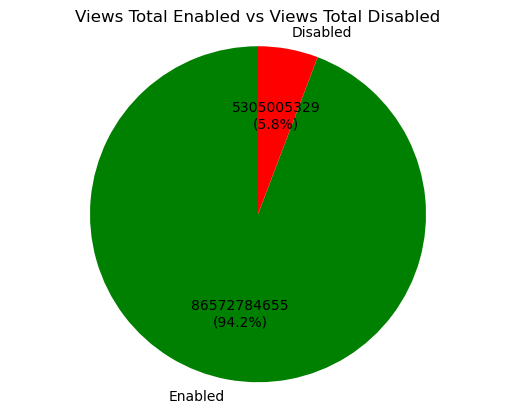

In [515]:
viewsTotalEnabled = viewsTotalEnabled
viewsTotalDisabled = viewsTotalDisabled

# Data
labels = ['Enabled', 'Disabled']
values = [viewsTotalEnabled, viewsTotalDisabled]

# Plotting the pie chart with actual values
plt.pie(values, labels=labels, autopct=lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(values) / 100, p), startangle=90, colors=['green', 'red'])

# Equal aspect ratio ensures that the pie chart is circular
plt.axis('equal')

# Adding a title
plt.title('Views Total Enabled vs Views Total Disabled')

# Display the pie chart
plt.show()

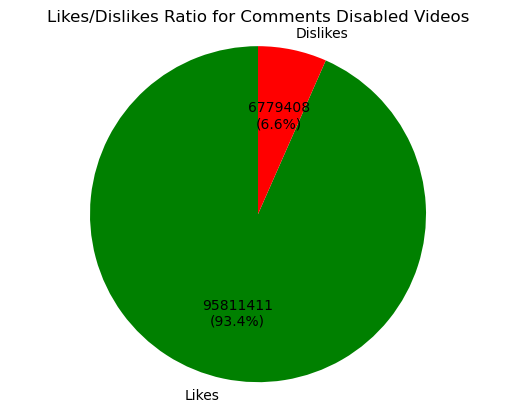

In [516]:
likesTotalDisabled = likesTotalDisabled
dislikesTotalDisabled = dislikesTotalDisabled

# Data
labels = ['Likes', 'Dislikes']
values = [likesTotalDisabled, dislikesTotalDisabled]

# Plotting the pie chart with actual values
plt.pie(values, labels=labels, autopct=lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(values) / 100, p), startangle=90, colors=['green', 'red'])

# Equal aspect ratio ensures that the pie chart is circular
plt.axis('equal')

# Adding a title
plt.title('Likes/Dislikes Ratio for Comments Disabled Videos')

# Display the pie chart
plt.show()

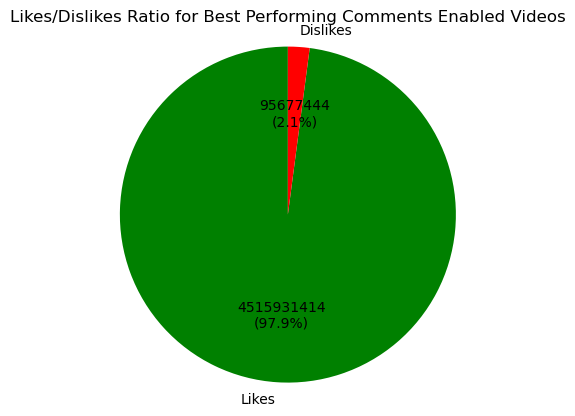

In [517]:
likesTotalEnabled = likesTotalEnabled
dilikesTotalEnabled = dilikesTotalEnabled

# Data
labels = ['Likes', 'Dislikes']
values = [likesTotalEnabled, dilikesTotalEnabled]

# Plotting the pie chart with actual values
plt.pie(values, labels=labels, autopct=lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(values) / 100, p), startangle=90, colors=['green', 'red'])

# Equal aspect ratio ensures that the pie chart is circular
plt.axis('equal')

# Adding a title
plt.title('Likes/Dislikes Ratio for Best Performing Comments Enabled Videos')

# Display the pie chart
plt.show()

**Worst Performing**

In [518]:
##For worst performing comments enabled
df_comments_enabled= df[df['comments_disabled'] == False]

df_comments_enabled=df_comments_enabled.drop(['tags','channelTitle','ratings_disabled','description','publishedAt','trending_date'], axis=1)

df_comments_enabled = df_comments_enabled.sort_values(by='view_count', ascending=False)

df_comments_enabled = df_comments_enabled.tail(317)

df_comments_enabled

,title,categoryId,comments_disabled,view_count,likes,dislikes,comment_count
44192,studio footage: “positions” outro,10,False,480245,150808,376,15309
74618,"Minecraft, but the world is on FIRE",20,False,478498,35012,610,306
89398,Can Sora Counter ANYTHING? -- Random Smash Ult...,20,False,478291,26153,355,2235
22863,Lindsey Stirling - Angels We Have Heard On High,10,False,477684,53828,274,2600
83195,New Brawler MEG BREAKDOWN! | Update INFO!,20,False,477437,35124,345,4895
...,...,...,...,...,...,...,...
1152,MMA Pros React to Chito Vera TKO Sean O'Malley...,17,False,96445,789,95,1255
87794,Squid Game Official Parody| Blameitonkway PatD...,23,False,93598,7068,108,255
4431,Merkules & The Game - ''Deathwish'' (Official ...,10,False,87479,11348,105,861
33608,"Caleb Plant roughs up Caleb Truax, wins by una...",17,False,58497,1190,97,720


In [519]:
viewsTotalEnabled = df_comments_enabled['view_count'].sum()
likesTotalEnabled = df_comments_enabled['likes'].sum()
dilikesTotalEnabled = df_comments_enabled['dislikes'].sum()

In [520]:
viewsTotalEnabled

100404901

In [521]:
print('For Comments Enabled')
print(f"Correlation between 'likes' and 'view_count': {e_correlation_ViewLike:.2f}")
print(f"Correlation between 'dislikes' and 'view_count': {e_correlation_ViewDislike:.2f}")
print(f"Correlation between 'likes' and 'dislikes': {e_correlation_LikesDislike:.2f}")


For Comments Enabled
Correlation between 'likes' and 'view_count': 0.84
Correlation between 'dislikes' and 'view_count': 0.74
Correlation between 'likes' and 'dislikes': 0.73


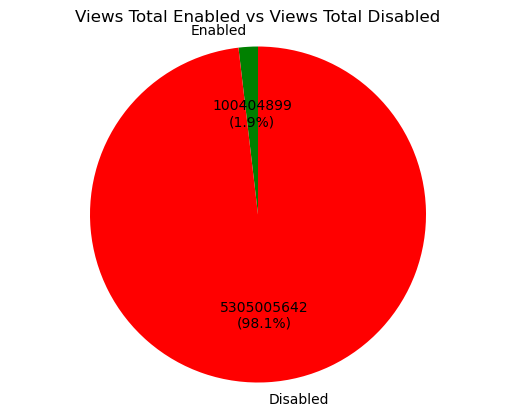

In [522]:
viewsTotalEnabled = viewsTotalEnabled
viewsTotalDisabled = viewsTotalDisabled

# Data
labels = ['Enabled', 'Disabled']
values = [viewsTotalEnabled, viewsTotalDisabled]

# Plotting the pie chart with actual values
plt.pie(values, labels=labels, autopct=lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(values) / 100, p), startangle=90, colors=['green', 'red'])

# Equal aspect ratio ensures that the pie chart is circular
plt.axis('equal')

# Adding a title
plt.title('Views Total Enabled vs Views Total Disabled')

# Display the pie chart
plt.show()

Ratings Analysis

In [523]:
df_ratings_enabled= df[df['ratings_disabled'] == False]

df_ratings_disabled= df[df['ratings_disabled'] == True]


df_ratings_disabled=df_ratings_disabled.drop(['comments_disabled','description','publishedAt','trending_date'], axis=1)

df_ratings_enabled=df_ratings_enabled.drop(['comments_disabled','description','publishedAt','trending_date'], axis=1)

df_ratings_enabled

,title,channelTitle,categoryId,tags,ratings_disabled,view_count,likes,dislikes,comment_count
0,I ASKED HER TO BE MY GIRLFRIEND...,Brawadis,22,brawadis|prank|basketball|skits|ghost|funny vi...,False,23894129,1345181,69984,302899
1,Apex Legends | Stories from the Outlands – “Th...,Apex Legends,20,Apex Legends|Apex Legends characters|new Apex ...,False,15496923,787930,16531,88147
2,I left youtube for a month and THIS is what ha...,jacksepticeye,24,jacksepticeye|funny|funny meme|memes|jacksepti...,False,21601491,2984775,27245,319081
3,XXL 2020 Freshman Class Revealed - Official An...,XXL,10,xxl freshman|xxl freshmen|2020 xxl freshman|20...,False,4994407,158882,14004,47763
4,Ultimate DIY Home Movie Theater for The LaBran...,Mr. Kate,26,The LaBrant Family|DIY|Interior Design|Makeove...,False,12314342,348515,10689,16118
...,...,...,...,...,...,...,...,...,...
98412,END OF VAN LIFE AFRICA,Eamon & Bec,19,van life|living in a van|vanlife|eamon and bec...,False,781969,21361,198,4157
98417,3 FOODS to TRY before you DIE: Irish Edition #...,Jorden Tually,19,jorden tually,False,384816,8684,429,358
98420,Vanilla Extract,Nick DiGiovanni,22,[None],False,1581217,72470,663,1434
98422,So I Wrote A Kids Book..📚,Peet Montzingo,22,peet montzingo|monzingo|mozingo|pete|mom|tikto...,False,2930794,96057,1827,1808


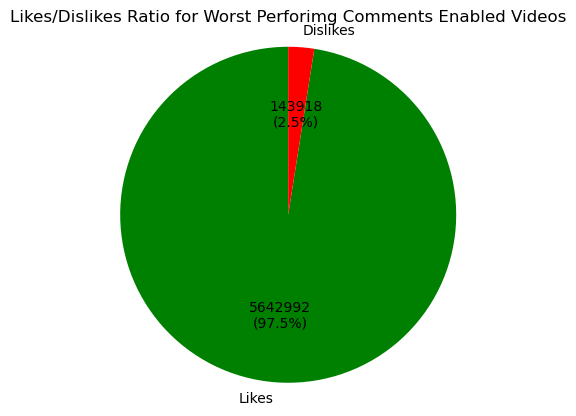

In [524]:
likesTotalEnabled = likesTotalEnabled
dilikesTotalEnabled = dilikesTotalEnabled

# Data
labels = ['Likes', 'Dislikes']
values = [likesTotalEnabled, dilikesTotalEnabled]

# Plotting the pie chart with actual values
plt.pie(values, labels=labels, autopct=lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(values) / 100, p), startangle=90, colors=['green', 'red'])

# Equal aspect ratio ensures that the pie chart is circular
plt.axis('equal')

# Adding a title
plt.title('Likes/Dislikes Ratio for Worst Perforimg Comments Enabled Videos')

# Display the pie chart
plt.show()

**Ratings Analysis**

In [525]:
viewsTotalRateDisabled = df_ratings_disabled['view_count'].sum()
viewsTotalRateEnabled = df_ratings_enabled['view_count'].sum()

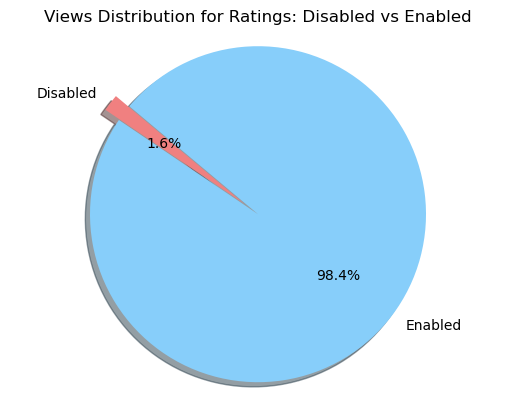

In [526]:
viewsTotalDisabled = 500
viewsTotalEnabled = 1000


labels = 'Disabled', 'Enabled'
sizes = [viewsTotalRateDisabled, viewsTotalRateEnabled]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  
plt.title('Views Distribution for Ratings: Disabled vs Enabled')
plt.show()

In [527]:
df

,title,publishedAt,channelTitle,categoryId,trending_date,tags,comments_disabled,ratings_disabled,description,view_count,likes,dislikes,comment_count
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,23894129,1345181,69984,302899
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,False,False,"While running her own modding shop, Ramya Pare...",15496923,787930,16531,88147
2,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,False,False,I left youtube for a month and this is what ha...,21601491,2984775,27245,319081
3,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,4994407,158882,14004,47763
4,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,False,False,Transforming The LaBrant Family's empty white ...,12314342,348515,10689,16118
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99311,BRASIL vs. BOLIVIA [5-1] | RESUMEN | ELIMINATO...,2023-09-09T04:55:46Z,CONMEBOL,17,2023-09-11T00:00:00Z,fútbol|pelota|gol|copa|libertadores|sudamerica...,False,True,"Espetáculo brasileiro! 🤩🔥Com 2️⃣ de Neymar, a ...",22708962,0,0,21462
99317,BOLIVIA vs. ARGENTINA [0-3] | RESUMEN | ELIMIN...,2023-09-13T00:12:29Z,CONMEBOL,17,2023-09-13T00:00:00Z,fútbol|pelota|gol|copa|libertadores|sudamerica...,False,True,¡Goleada de #Argentina en La Paz! La Albiceles...,20276422,0,0,15458
99323,Nintendo Direct 9.14.2023 - Nintendo Switch,2023-09-14T14:48:31Z,Nintendo of America,20,2023-09-15T00:00:00Z,nintendo|game|gameplay|fun|video game|action|a...,False,True,Watch the latest Nintendo Direct livestream fe...,31968780,0,0,73254
99324,[스우파2] 메가 크루 미션 대중 평가 l 잼 리퍼블릭(JAM REPUBLIC),2023-09-12T15:16:34Z,The CHOOM (더 춤),24,2023-09-15T00:00:00Z,[None],False,True,[스우파2] 메가 크루 미션 대중 평가 l 잼 리퍼블릭(JAM REPUBLIC)지금...,18269413,0,0,88951


In [528]:
df= df.sort_values(by='view_count', ascending=False)

df_10 = df.head(1533)

In [529]:
commentEN_ratingEN_df = df_10[(df_10['comments_disabled'] == False) & (df_10['ratings_disabled'] == False)]

commentEN_ratingDIS_df = df_10[(df_10['comments_disabled'] == False) & (df_10['ratings_disabled'] == True)]

commentDIS_ratingEN_df = df_10[(df_10['comments_disabled'] == True) & (df_10['ratings_disabled'] == False)]

commentDIS_ratingDIS_df = df_10[(df_10['comments_disabled'] == True) & (df_10['ratings_disabled'] == True)]

In [530]:
#Enabled Enabled
EE_correlation_ViewLike = commentEN_ratingEN_df['likes'].corr(commentEN_ratingEN_df['view_count'])
EE_correlation_ViewDislike = commentEN_ratingEN_df['dislikes'].corr(commentEN_ratingEN_df['view_count'])
EE_correlation_LikesDislike = commentEN_ratingEN_df['likes'].corr(commentEN_ratingEN_df['dislikes'])

#Enabled Disabled
ED_correlation_ViewLike = commentEN_ratingDIS_df['likes'].corr(commentEN_ratingDIS_df['view_count'])
ED_correlation_ViewDislike = commentEN_ratingDIS_df['dislikes'].corr(commentEN_ratingDIS_df['view_count'])
ED_correlation_LikesDislike = commentEN_ratingDIS_df['likes'].corr(commentEN_ratingDIS_df['dislikes'])

#Disabled Enabled
DE_correlation_ViewLike = commentDIS_ratingEN_df['likes'].corr(commentDIS_ratingEN_df['view_count'])
DE_correlation_ViewDislike = commentDIS_ratingEN_df['dislikes'].corr(commentDIS_ratingEN_df['view_count'])
DE_correlation_LikesDislike = commentDIS_ratingEN_df['likes'].corr(commentDIS_ratingEN_df['dislikes'])

#Disabled Disabled
DD_correlation_ViewLike = commentDIS_ratingDIS_df['likes'].corr(commentDIS_ratingDIS_df['view_count'])
DD_correlation_ViewDislike = commentDIS_ratingDIS_df['dislikes'].corr(commentDIS_ratingDIS_df['view_count'])
DD_correlation_LikesDislike = commentDIS_ratingDIS_df['likes'].corr(commentDIS_ratingDIS_df['dislikes'])

# Display the correlations
print('For Enabled Enabled')
print(f"Correlation between 'likes' and 'view_count': {EE_correlation_ViewLike:.2f}")
print(f"Correlation between 'dislikes' and 'view_count': {EE_correlation_ViewDislike:.2f}")
print(f"Correlation between 'likes' and 'dislikes': {EE_correlation_LikesDislike:.2f}")

print('\nDisabled Enabled')
print(f"Correlation between 'likes' and 'view_count': {ED_correlation_ViewLike:.2f}")
print(f"Correlation between 'dislikes' and 'view_count': {ED_correlation_LikesDislike:.2f}")
print(f"Correlation between 'likes' and 'dislikes': {ED_correlation_LikesDislike:.2f}")

print('\nEnabled Disabled')
print(f"Correlation between 'likes' and 'view_count': {ED_correlation_ViewLike:.2f}")
print(f"Correlation between 'dislikes' and 'view_count': {ED_correlation_ViewLike:.2f}")
print(f"Correlation between 'likes' and 'dislikes': {ED_correlation_ViewLike:.2f}")

print('\nDisabled Disabled')
print(f"Correlation between 'likes' and 'view_count': {DD_correlation_ViewLike:.2f}")
print(f"Correlation between 'dislikes' and 'view_count': {DD_correlation_ViewDislike:.2f}")
print(f"Correlation between 'likes' and 'dislikes': {DD_correlation_LikesDislike:.2f}")

For Enabled Enabled
Correlation between 'likes' and 'view_count': 0.86
Correlation between 'dislikes' and 'view_count': 0.75
Correlation between 'likes' and 'dislikes': 0.73

Disabled Enabled
Correlation between 'likes' and 'view_count': nan
Correlation between 'dislikes' and 'view_count': nan
Correlation between 'likes' and 'dislikes': nan

Enabled Disabled
Correlation between 'likes' and 'view_count': nan
Correlation between 'dislikes' and 'view_count': nan
Correlation between 'likes' and 'dislikes': nan

Disabled Disabled
Correlation between 'likes' and 'view_count': nan
Correlation between 'dislikes' and 'view_count': nan
Correlation between 'likes' and 'dislikes': nan


In [531]:
commentEN_ratingEN = commentEN_ratingEN_df['view_count'].sum()

commentEN_ratingDIS = commentEN_ratingDIS_df['view_count'].sum()

commentDIS_ratingEN = commentDIS_ratingEN_df['view_count'].sum()

commentDIS_ratingDIS = commentDIS_ratingDIS_df['view_count'].sum()

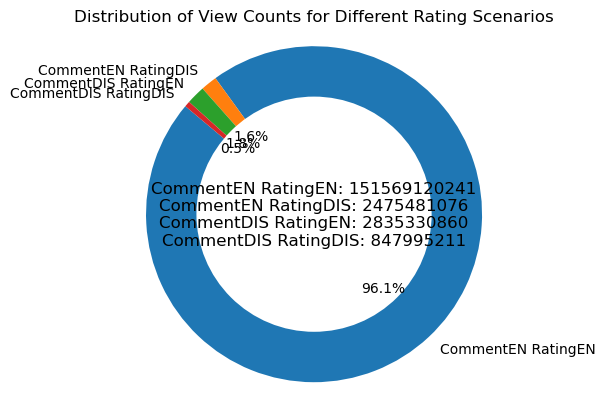

In [532]:
values = [commentEN_ratingEN, commentEN_ratingDIS, commentDIS_ratingEN, commentDIS_ratingDIS]
labels = ['CommentEN RatingEN', 'CommentEN RatingDIS', 'CommentDIS RatingEN', 'CommentDIS RatingDIS']

# Create a pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Draw a circle at the center to make it look like a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that the pie chart is circular
plt.axis('equal')  

# Adding a title
plt.title('Distribution of View Counts for Different Rating Scenarios')

# Display the actual values in the center
plt.text(0, 0, '\n'.join([f'{label}: {value}' for label, value in zip(labels, values)]), 
         horizontalalignment='center', verticalalignment='center', fontsize=12, color='black')

# Display the chart
plt.show()

In [533]:
commentEN_ratingEN = commentEN_ratingEN_df['likes'].sum()

commentEN_ratingDIS = commentEN_ratingDIS_df['likes'].sum()

commentDIS_ratingEN = commentDIS_ratingEN_df['likes'].sum()

commentDIS_ratingDIS = commentDIS_ratingDIS_df['likes'].sum()

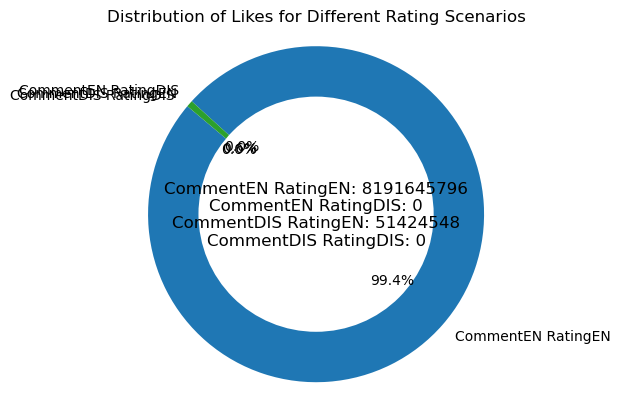

In [534]:
values = [commentEN_ratingEN, commentEN_ratingDIS, commentDIS_ratingEN, commentDIS_ratingDIS]
labels = ['CommentEN RatingEN', 'CommentEN RatingDIS', 'CommentDIS RatingEN', 'CommentDIS RatingDIS']

# Create a pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Draw a circle at the center to make it look like a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that the pie chart is circular
plt.axis('equal')  

# Adding a title
plt.title('Distribution of Likes for Different Rating Scenarios')

# Display the actual values in the center
plt.text(0, 0, '\n'.join([f'{label}: {value}' for label, value in zip(labels, values)]), 
         horizontalalignment='center', verticalalignment='center', fontsize=12, color='black')

# Display the chart
plt.show()

In [535]:
commentEN_ratingEN = commentEN_ratingEN_df['dislikes'].sum()

commentEN_ratingDIS = commentEN_ratingDIS_df['dislikes'].sum()

commentDIS_ratingEN = commentDIS_ratingEN_df['dislikes'].sum()

commentDIS_ratingDIS = commentDIS_ratingDIS_df['dislikes'].sum()

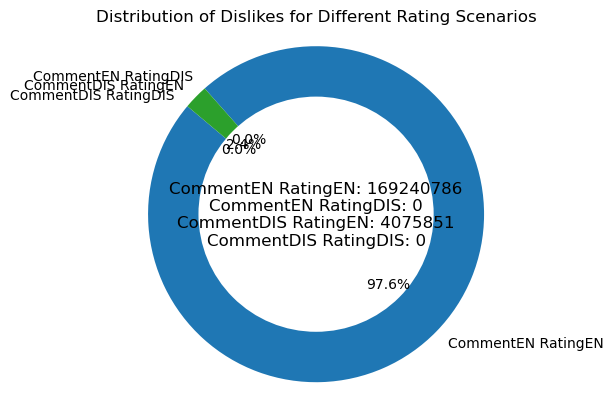

In [536]:
values = [commentEN_ratingEN, commentEN_ratingDIS, commentDIS_ratingEN, commentDIS_ratingDIS]
labels = ['CommentEN RatingEN', 'CommentEN RatingDIS', 'CommentDIS RatingEN', 'CommentDIS RatingDIS']

# Create a pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Draw a circle at the center to make it look like a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that the pie chart is circular
plt.axis('equal')  

# Adding a title
plt.title('Distribution of Dislikes for Different Rating Scenarios')

# Display the actual values in the center
plt.text(0, 0, '\n'.join([f'{label}: {value}' for label, value in zip(labels, values)]), 
         horizontalalignment='center', verticalalignment='center', fontsize=12, color='black')

# Display the chart
plt.show()

Count of Comments Enabled

In [537]:
disabled_count = df[df['comments_disabled'] == True].count()
enabled_count = df[df['comments_disabled'] == False].count()


print(f"Disabled Count: {disabled_count['title']}")
print(f"Enabled Count: {enabled_count['title']}")

Disabled Count: 317
Enabled Count: 17820


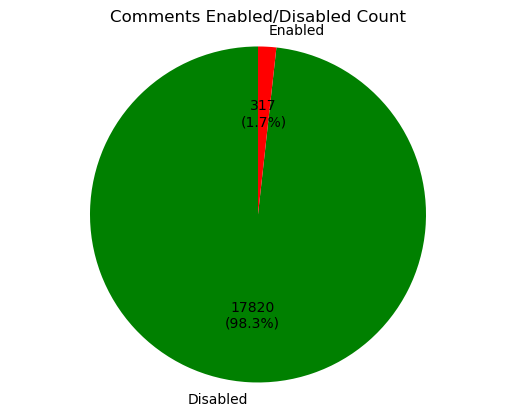

In [538]:
# Assuming disabled_count and enabled_count are DataFrame counts
disabled_count = df[df['comments_disabled'] == True].count()['title']
enabled_count = df[df['comments_disabled'] == False].count()['title']

# Data
labels = ['Disabled', 'Enabled']
values = [enabled_count, disabled_count]

# Plotting the pie chart with actual values
plt.pie(values, labels=labels, autopct=lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(values) / 100, p), startangle=90, colors=['green', 'red'])

# Equal aspect ratio ensures that the pie chart is circular
plt.axis('equal')

# Adding a title
plt.title('Comments Enabled/Disabled Count')

# Display the pie chart
plt.show()

In [542]:
df_comments_disabled= df[df['comments_disabled'] == True]

df_comments_enabled= df[df['comments_disabled'] == False]


df_comments_disabled=df_comments_disabled.drop(['tags','channelTitle','ratings_disabled','description','publishedAt','trending_date'], axis=1)

df_comments_enabled=df_comments_enabled.drop(['tags','channelTitle','ratings_disabled','description','publishedAt','trending_date'], axis=1)

In [543]:
viewsTotalDisabled = df_comments_disabled['view_count'].sum()
viewsTotalEnabled = df_comments_enabled['view_count'].sum()

In [544]:
likesTotalDisabled = df_comments_disabled['likes'].sum()
likesTotalEnabled = df_comments_enabled['likes'].sum()

dislikesTotalDisabled = df_comments_disabled['dislikes'].sum()
dilikesTotalEnabled = df_comments_enabled['dislikes'].sum()
print(likesTotalEnabled,likesTotalDisabled)

14893574636 95811410


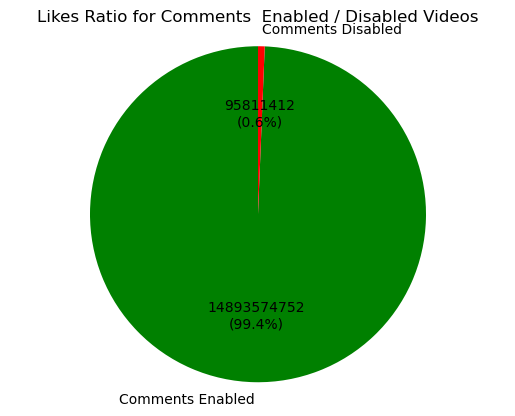

In [546]:
likesTotalDisabled = likesTotalDisabled
likesTotalEnabled = likesTotalEnabled

# Data
labels = ['Comments Enabled', 'Comments Disabled']
values = [likesTotalEnabled, likesTotalDisabled]

# Plotting the pie chart with actual values
plt.pie(values, labels=labels, autopct=lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(values) / 100, p), startangle=90, colors=['green', 'red'])

# Equal aspect ratio ensures that the pie chart is circular
plt.axis('equal')

# Adding a title
plt.title('Likes Ratio for Comments  Enabled / Disabled Videos')

# Display the pie chart
plt.show()

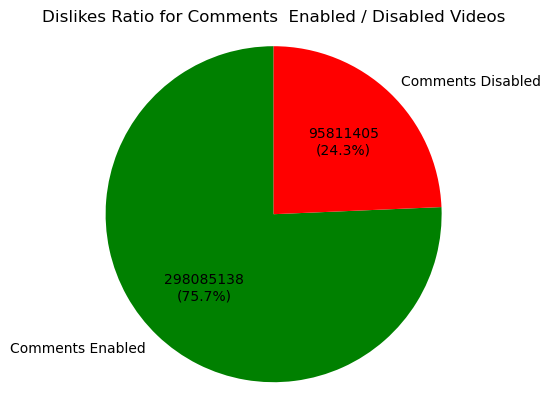

In [547]:
dislikesTotalDisabled = dislikesTotalDisabled
dilikesTotalEnabled = dilikesTotalEnabled

# Data
labels = ['Comments Enabled', 'Comments Disabled']
values = [dilikesTotalEnabled, likesTotalDisabled]

# Plotting the pie chart with actual values
plt.pie(values, labels=labels, autopct=lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(values) / 100, p), startangle=90, colors=['green', 'red'])

# Equal aspect ratio ensures that the pie chart is circular
plt.axis('equal')

# Adding a title
plt.title('Dislikes Ratio for Comments  Enabled / Disabled Videos')

# Display the pie chart
plt.show()